In [1]:
import os
from typing import Union, Optional, Tuple

import numpy as np
import pandas as pd

# ASE imports
from ase.build import bulk, stack
from ase.lattice.cubic import BodyCenteredCubic as bcc

# Pyiron workflow imports
import pyiron_workflow as pwf
from pyiron_workflow import Workflow
from pyiron_workflow_atomistics.dataclass_storage import CalcInputMinimize
from pyiron_workflow_atomistics.bulk import optimise_cubic_lattice_parameter
from pyiron_workflow_lammps.engine import LammpsEngine
from pyiron_workflow_atomistics.structure_manipulator.tools import create_supercell, create_supercell_with_min_dimensions
from pyiron_workflow_atomistics.structure_manipulator.tools import substitutional_swap_one_site

from pyiron_workflow_atomistics.gb.gb_code.searcher import get_gb_code_df_with_structures
from pyiron_workflow_atomistics.calculator import calculate_structure_node
# Pymatgen imports
from pymatgen.core import Structure
from pymatgen.io.ase import AseAtomsAdaptor

%load_ext autoreload
%autoreload 2

/root/miniconda3/envs/pyiron_pypi_workflow_lammps/lib/python3.12/site-packages/pyiron_workflow_lammps/engine.py:116: RuntimeWarning: 'mode' already set to 'minimize' and also implied by EngineInput; no change.
  warnings.warn(
/root/miniconda3/envs/pyiron_pypi_workflow_lammps/lib/python3.12/site-packages/pyiron_workflow_lammps/engine.py:163: RuntimeWarning: 'max_iterations' provided to Engine takes precedence over EngineInput.max_iterations. Overwriting EngineInput.max_iterations 1000000 with 10000
  warnings.warn(
2025-11-01 21:10:29,196 - pyiron_log - WARNING - Directory 'gb_segregation/strain_000' already exists. Existing files may be overwritten.


current mode  minimize


2025-11-01 21:10:31,132 - pyiron_log - WARNING - Directory 'gb_segregation/strain_001' already exists. Existing files may be overwritten.
2025-11-01 21:10:32,780 - pyiron_log - WARNING - Directory 'gb_segregation/strain_002' already exists. Existing files may be overwritten.
2025-11-01 21:10:34,542 - pyiron_log - WARNING - Directory 'gb_segregation/strain_003' already exists. Existing files may be overwritten.
2025-11-01 21:10:36,184 - pyiron_log - WARNING - Directory 'gb_segregation/strain_004' already exists. Existing files may be overwritten.
2025-11-01 21:10:37,884 - pyiron_log - WARNING - Directory 'gb_segregation/strain_005' already exists. Existing files may be overwritten.
2025-11-01 21:10:39,660 - pyiron_log - WARNING - Directory 'gb_segregation/strain_006' already exists. Existing files may be overwritten.
2025-11-01 21:10:41,307 - pyiron_log - WARNING - Directory 'gb_segregation/strain_007' already exists. Existing files may be overwritten.
2025-11-01 21:10:43,262 - pyiron_l

current mode  minimize


2025-11-01 21:11:08,873 - pyiron_log - WARNING - Directory 'solution_energy_solute' already exists. Existing files may be overwritten.


current mode  minimize


2025-11-01 21:11:10,687 - pyiron_log - WARNING - Directory 'gb_study/gb_length_optimiser/ext_0.800' already exists. Existing files may be overwritten.


current mode  static
current mode  minimize


2025-11-01 21:11:12,553 - pyiron_log - WARNING - Directory 'gb_study/gb_length_optimiser/ext_0.300' already exists. Existing files may be overwritten.
2025-11-01 21:11:14,255 - pyiron_log - WARNING - Directory 'gb_study/gb_length_optimiser/ext_-0.200' already exists. Existing files may be overwritten.
2025-11-01 21:11:16,212 - pyiron_log - WARNING - Directory 'gb_study/gb_length_optimiser/ext_0.050' already exists. Existing files may be overwritten.
2025-11-01 21:11:17,847 - pyiron_log - WARNING - Directory 'gb_study/gb_length_optimiser/ext_0.025' already exists. Existing files may be overwritten.
2025-11-01 21:11:19,473 - pyiron_log - WARNING - Directory 'gb_study/gb_length_optimiser/ext_0.000' already exists. Existing files may be overwritten.
2025-11-01 21:11:21,073 - pyiron_log - WARNING - Directory 'gb_study/gb_length_optimiser/ext_-0.025' already exists. Existing files may be overwritten.
2025-11-01 21:11:22,733 - pyiron_log - WARNING - Directory 'gb_study/gb_length_optimiser/ext

mid_frac: 0.5106208277869655
cell_len: 54.18245868951265


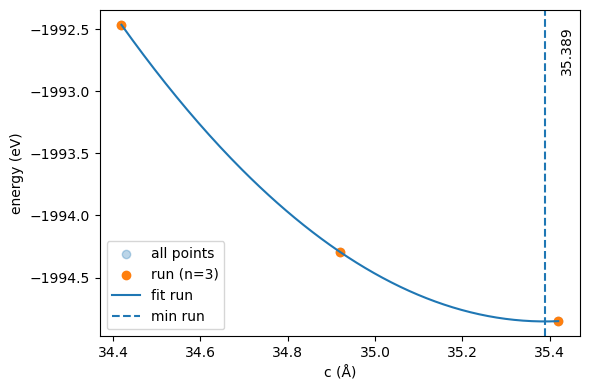

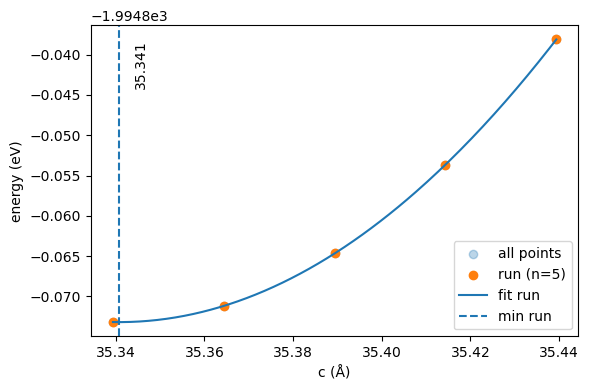

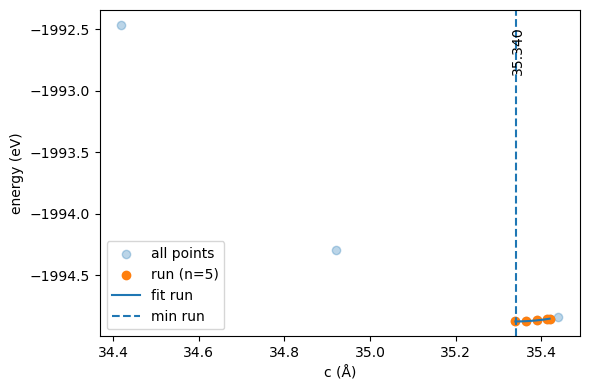

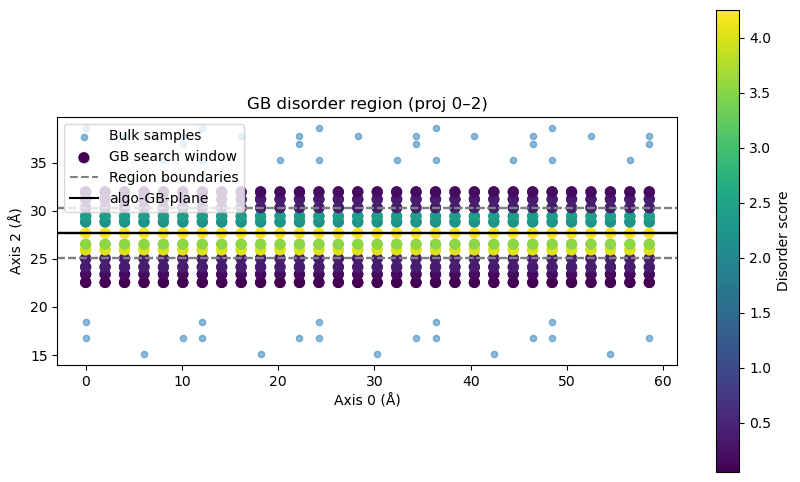

2025-11-01 21:11:41,460 - pyiron_log - WARNING - Directory 'gb_study/gb_seg_supercell' already exists. Existing files may be overwritten.
2025-11-01 21:11:43,676 - pyiron_log - WARNING - Directory 'pure_grain_boundary_study/cleavage_study/cleavage_rigid/cleavage_rigid_cp_32.369' already exists. Existing files may be overwritten.
2025-11-01 21:11:45,241 - pyiron_log - WARNING - Directory 'pure_grain_boundary_study/cleavage_study/cleavage_rigid/cleavage_rigid_cp_31.568' already exists. Existing files may be overwritten.
2025-11-01 21:11:46,820 - pyiron_log - WARNING - Directory 'pure_grain_boundary_study/cleavage_study/cleavage_rigid/cleavage_rigid_cp_30.747' already exists. Existing files may be overwritten.
2025-11-01 21:11:48,375 - pyiron_log - WARNING - Directory 'pure_grain_boundary_study/cleavage_study/cleavage_rigid/cleavage_rigid_cp_29.86' already exists. Existing files may be overwritten.
2025-11-01 21:11:49,949 - pyiron_log - WARNING - Directory 'pure_grain_boundary_study/cleav

{'opt_cubic_cell__B': np.float64(177.0390163507032),
 'opt_cubic_cell__volumes': [np.float64(21.787771257000003),
  np.float64(22.08554991529631),
  np.float64(22.386029495370348),
  np.float64(22.689222191000006),
  np.float64(22.99514019596296),
  np.float64(23.303795704037036),
  np.float64(23.615200909),
  np.float64(23.92936800462963),
  np.float64(24.24630918470369),
  np.float64(24.56603664300001)],
 'opt_cubic_cell__structures': [Atoms(symbols='Fe2', pbc=True, cell=[[2.7929999999999997, 1.7102192550092785e-16, 1.7102192550092785e-16], [0.0, 2.7929999999999997, 1.7102192550092785e-16], [0.0, 0.0, 2.7929999999999997]]),
  Atoms(symbols='Fe2', pbc=True, cell=[[2.805666666666667, 1.717975351403879e-16, 1.717975351403879e-16], [0.0, 2.805666666666667, 1.717975351403879e-16], [0.0, 0.0, 2.805666666666667]]),
  Atoms(symbols='Fe2', pbc=True, cell=[[2.8183333333333325, 1.7257314477984784e-16, 1.7257314477984784e-16], [0.0, 2.8183333333333325, 1.7257314477984784e-16], [0.0, 0.0, 2.81833

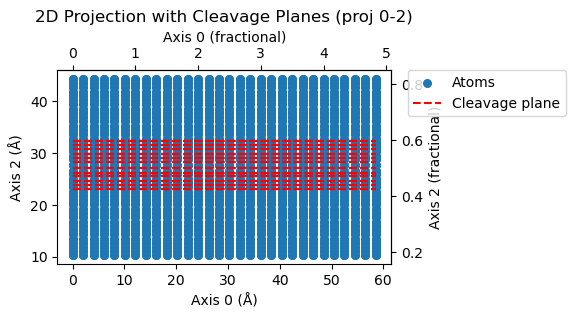

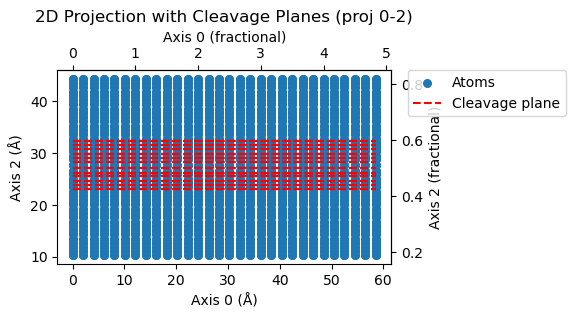

In [ ]:
wf = Workflow("gb_segregation", delete_existing_savefiles=True)
# /root/github_dev/pyiron_workflow_atomistics/pyiron_workflow_atomistics
structure = bulk("Fe", a=2.85, cubic=True)

# Engine definition
# First, define generic engine input - we want minimization
inp = CalcInputMinimize()
inp.relax_cell = False # Don't relax the cell
Engine = LammpsEngine(EngineInput = inp) # Use the LAMMPS engine
Engine.working_directory = "gb_segregation" # Set the working directory
Engine.lammps_log_filepath = "minimize.log" # Set the log file path
# Adjust this line to match your LAMMPS installation (this works for conda-lammps)
Engine.command = "lmp -in in.lmp -log minimize.log" # Set the command
Engine.input_script_pair_style = "eam/fs" # Set the pair style
Engine.path_to_model = os.getcwd() + "/Al-Fe.eam.fs" # Set the path to the model

wf.opt_cubic_cell = optimise_cubic_lattice_parameter(
    structure=structure, # The structure to optimize
    name="Fe", # The name of the structure
    crystalstructure="bcc", # The crystal structure
    calculation_engine=Engine, # The calculation engine
    parent_working_directory="opt_cubic_cell", # The parent working directory
    rattle=0.1, # The rattle parameter (0.1 Angstrom is a good value)
    strain_range=(-0.02, 0.02), # The strain range
    num_points=10, # The number of points in the strain range
    eos_type="birchmurnaghan", # The equation of state type
)

from pyiron_workflow_atomistics.utils import duplicate_engine
# Just a duplicate of the bulk engine, different working directory
Engine_bulk = duplicate_engine.node_function(Engine, "solution_energy_bulk")
Engine_bulk.working_directory = "solution_energy_bulk"
# Create a supercell with minimum dimensions 
# This is to ensure no solute-solute interactions with neighbouring images
wf.supercell = create_supercell_with_min_dimensions(
    base_structure=wf.opt_cubic_cell.outputs.equil_struct,
    min_dimensions=[12, 12, 12], # The minimum dimensions of the supercell (Angstrom)
)
wf.supercell_calc = calculate_structure_node(wf.supercell, calculation_engine=Engine_bulk)

# Just a duplicate of the bulk engine, different working directory
Engine_bulk_solute = duplicate_engine.node_function(Engine, "solution_energy_solute")
Engine_bulk_solute.working_directory = "solution_energy_solute"
# Supercell with one solute (substitutional swap Fe -> Al)
wf.supercell_with_1sol = substitutional_swap_one_site(
    base_structure=wf.supercell,
    defect_site=0,
    new_symbol="Al",
)
wf.supercell_with_1sol_calc = calculate_structure_node(
    structure=wf.supercell_with_1sol,
    calculation_engine=Engine_bulk_solute,
)

# Calculate the solution energy
@pwf.as_function_node("solution_energy")
def calculate_soln_energy(bulk_structure_energy, soln_structure_energy):
    return soln_structure_energy - bulk_structure_energy
wf.soln_energy = calculate_soln_energy(
    bulk_structure_energy=wf.supercell_calc.outputs.calc_output.final_energy,
    soln_structure_energy=wf.supercell_with_1sol_calc.outputs.calc_output.final_energy,
)
# Search GBCode for valid CSL GB structures
wf.gb_code_df = get_gb_code_df_with_structures(
                                                axes_list=[np.array([1, 1, 1]), np.array([1, 1, 0]), np.array([1, 0, 0])],
                                                sigma_limit=10, # The maximum sigma value for the gb
                                                lim_plane_index=3, # The maximum search index of the plane to cleave the bulk structure
                                                max_atoms=100, # The maximum number of atoms in the "primordial" structure (smallest structure according to gb_code)
                                                max_workers=None, # The maximum number of workers for parallel processing None means use all available cores
                                                deduplicate=True, # gb_code generates duplicate structures, this removes them
                                                element="Fe", # The element of the bulk structure
                                                basis="bcc", # The basis of the bulk structure
                                                lattice_param=wf.opt_cubic_cell.outputs.a0, # The lattice parameter of the bulk structure
                                                equil_volume_per_atom=wf.opt_cubic_cell.outputs.equil_volume_per_atom, # The equilibrium volume per atom of the bulk structure
                                                min_inplane_gb_length=10, # The minimum length of the grain along the normal to the gb plane
                                                req_length_grain=15, # The required length of the grain along the normal to the gb plane
                                                grain_length_axis=0, # The axis along which the grain length is measured
                                            )

# Just a duplicate of the bulk engine, different working directory
Engine_gb = duplicate_engine.node_function(Engine, "gb_study")
Engine_gb.working_directory = "gb_study"

# Need a static engine to calculate the rigid surface energy for cleavage studies
from pyiron_workflow_atomistics.dataclass_storage import CalcInputStatic
inp = CalcInputStatic()
Engine_static = LammpsEngine(EngineInput = inp)
Engine_static.working_directory = "pure_grain_boundary_study"
Engine_static.lammps_log_filepath = "static.log"
Engine_static.command = "lmp -in in.lmp -log static.log"
Engine_static.input_script_pair_style = "eam/fs"
Engine_static.path_to_model = os.getcwd() + "/Al-Fe.eam.fs"

from pyiron_workflow_atomistics.gb.gb_study import pure_gb_study
from pyiron_workflow_atomistics.gb.dataclass_storage import CleaveGBStructureInput, PlotCleaveInput
from pyiron_workflow_atomistics.featurisers import voronoiSiteFeaturiser
wf.pure_gb_study = pure_gb_study(
                    gb_structure = wf.gb_code_df.outputs.gb_code_df_with_structures.iloc[0].structure, # The grain boundary structure
                    equil_bulk_volume = wf.opt_cubic_cell.outputs.equil_volume_per_atom, # The equilibrium volume per atom of the bulk structure
                    equil_bulk_energy = wf.opt_cubic_cell.outputs.equil_energy_per_atom, # The equilibrium energy per atom of the bulk structure
                    extensions_stage1 = np.linspace(-0.2, 0.8, 3), # The extensions for the first stage (in Angstrom)
                    extensions_stage2 = np.linspace(-0.05, 0.05, 5), # The extensions for the second stage around minima of first stage (in Angstrom)
                    calculation_engine = Engine_gb, # The calculation engine for the grain boundary study
                    static_calculation_engine = Engine_static, # The calculation engine for the static study
                    length_interpolate_min_n_points=5, # The minimum number of points for the length interpolation
                    gb_normal_axis="c", # The axis along which the grain boundary normal is defined
                    vacuum_length=20, # The vacuum length
                    min_inplane_cell_lengths=[6, 6, None], # The minimum in-plane cell lengths
                    featuriser = voronoiSiteFeaturiser, # The featuriser for the site featurisation
                    approx_frac = 0.5, # The fraction of the cell length to use for the approximation
                    tolerance = 5.0, # The tolerance for the site featurisation
                    bulk_offset = 10.0, # The bulk offset for the site featurisation
                    slab_thickness = 2.0, # The slab thickness for the site featurisation
                    featuriser_kwargs = None, # The kwargs for the site featurisation
                    n_bulk = 10, # The number of bulk sites to sample for the site featurisation
                    threshold_frac = 0.3, # The threshold fraction to qualify for GB region for the site featurisation
                    CleaveGBStructure_Input=CleaveGBStructureInput(tol=0.3), # The input for the CleaveGBStructure node
                    PlotCleave_Input=PlotCleaveInput()) # The input for the PlotCleave node

from pyiron_workflow_atomistics.gb.segregation import calculate_substitutional_segregation_GB, get_unique_sites_SOAP
wf.site_duplicate_df = get_unique_sites_SOAP(structure = wf.pure_gb_study.outputs.pure_grain_boundary_structure_vacuum,
                                              defect_sites = wf.pure_gb_study.outputs.gb_plane_analysis_dict["extended_sel_indices"],
                                              r_cut = 6.0,
                                              n_max = 10,
                                              l_max = 10,
                                              n_jobs = -1,
                                              periodic = True,
                                              pca_variance_threshold = 0.999,
                                              similarity_threshold = 0.99999)


Engine_segregation = duplicate_engine.node_function(Engine, "segregation_study")
Engine_segregation.working_directory = "segregation_study"

wf.gb_seg_calcs = calculate_substitutional_segregation_GB(
    structure = wf.pure_gb_study.outputs.pure_grain_boundary_structure_vacuum,
    defect_sites = wf.site_duplicate_df.outputs.unique_sites_list,
    element = "Al",
    structure_basename = "pureGB_Fe_seg",
    parent_dir = "gb_seg_lammps",
    calculation_engine = Engine_segregation,
    unique_sites_df = wf.site_duplicate_df.outputs.df,
    df_filename = "seg_calcs_df.pkl",
)

wf.run()
wf.run()

In [16]:
df = wf.gb_seg_calcs.outputs.gb_seg_calcs_df.value.copy()
df["energy"] = df.calc_output.apply(lambda x: x.final_energy)
df["Eseg"] = (
    df.energy
    - wf.pure_gb_study.outputs.pure_grain_boundary_structure_vacuum_energy.value
    - wf.soln_energy.outputs.solution_energy.value
)

import numpy as np

gb_pos = wf.pure_gb_study.outputs.gb_plane_analysis_dict.value["gb_cart"]

# Fix: positions might be a 2D array for each structure;
# make sure to use correct slicing and avoid invalid index to scalar variable errors.
def get_site_gb_distance(row):
    struct = row["structure"]
    rep_idx = row["rep"]
    print(struct.positions[rep_idx])
    dist = np.round(np.abs(struct.positions[rep_idx][2] - gb_pos), 1)
    return dist

df["dist_GB"] = df.apply(get_site_gb_distance, axis=1)

df

[ 0.         13.98835048 22.54046707]
[ 0.          2.33139175 23.38617939]
[ 2.01904448  1.16569588 24.1422156 ]
[0.00000000e+00 4.57367787e-09 2.50296563e+01]
[ 0.          2.33139175 25.9176134 ]
[ 2.01904448  1.16569588 26.5074835 ]
[0.00000000e+00 2.40929137e-09 2.76666919e+01]
[ 0.          2.33139175 29.41569457]
[0.00000000e+00 4.63887981e-09 3.03033515e+01]
[ 2.01904448  1.16569588 31.19046762]
[ 0.          2.33139175 31.94646087]


,rep,same,structure,calc_output,energy,Eseg,dist_GB
0,30,"[31, 114, 115, 198, 199, 282, 283, 366, 367, 4...","(Atom('Fe', [np.float64(0.0), np.float64(1.272...","EngineOutput(\n convergence=True,\n energies...",-1967.564746,-0.045672,5.1
1,32,"[33, 116, 117, 200, 201, 284, 285, 368, 369, 4...","(Atom('Fe', [np.float64(0.0), np.float64(1.272...","EngineOutput(\n convergence=True,\n energies...",-1967.470678,0.048395,4.3
2,34,"[35, 118, 119, 202, 203, 286, 287, 370, 371, 4...","(Atom('Fe', [np.float64(0.0), np.float64(1.272...","EngineOutput(\n convergence=True,\n energies...",-1967.517386,0.001687,3.5
3,36,"[37, 120, 121, 204, 205, 288, 289, 372, 373, 4...","(Atom('Fe', [np.float64(0.0), np.float64(1.272...","EngineOutput(\n convergence=True,\n energies...",-1967.557772,-0.038699,2.6
4,38,"[39, 122, 123, 206, 207, 290, 291, 374, 375, 4...","(Atom('Fe', [np.float64(0.0), np.float64(1.272...","EngineOutput(\n convergence=True,\n energies...",-1967.329950,0.189123,1.7
5,40,"[41, 44, 45, 124, 125, 128, 129, 208, 209, 212...","(Atom('Fe', [np.float64(0.0), np.float64(1.272...","EngineOutput(\n convergence=True,\n energies...",-1967.568329,-0.049256,1.2
6,42,"[43, 126, 127, 210, 211, 294, 295, 378, 379, 4...","(Atom('Fe', [np.float64(0.0), np.float64(1.272...","EngineOutput(\n convergence=True,\n energies...",-1967.445433,0.073641,0.0
7,46,"[47, 130, 131, 214, 215, 298, 299, 382, 383, 4...","(Atom('Fe', [np.float64(0.0), np.float64(1.272...","EngineOutput(\n convergence=True,\n energies...",-1967.330074,0.189000,1.7
8,48,"[49, 132, 133, 216, 217, 300, 301, 384, 385, 4...","(Atom('Fe', [np.float64(0.0), np.float64(1.272...","EngineOutput(\n convergence=True,\n energies...",-1967.557840,-0.038766,2.6
9,50,"[51, 134, 135, 218, 219, 302, 303, 386, 387, 4...","(Atom('Fe', [np.float64(0.0), np.float64(1.272...","EngineOutput(\n convergence=True,\n energies...",-1967.517007,0.002066,3.5
